# 🎛️ Hyperparameter Tuning + Cross-Validation

**Semana 3, Dia 2** | 05/11/2025

## 🎯 Objetivos
1. Implementar Grid Search e Random Search
2. Aplicar estratégias de Cross-Validation
3. Analisar Learning Curves (overfitting vs underfitting)
4. Criar Pipeline ML completo e automatizado
5. Feature Selection e Dimensionality Reduction (PCA)

## 📚 Conteúdo
- **Grid Search:** Busca exaustiva em grid de hiperparâmetros
- **Random Search:** Busca aleatória (mais eficiente)
- **Cross-Validation:** K-Fold, Stratified K-Fold
- **Learning Curves:** Diagnóstico de overfitting/underfitting
- **Pipeline:** Automatização de preprocessing + treinamento
- **Feature Selection:** SelectKBest, RFE (Recursive Feature Elimination)
- **PCA:** Redução de dimensionalidade

---

## 1. 📦 Imports e Setup

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn - Preprocessing
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    RandomizedSearchCV,
    cross_val_score,
    StratifiedKFold,
    learning_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    confusion_matrix
)

# Configurações visuais
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Imports concluídos!")
print(f"📊 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")

✅ Imports concluídos!
📊 Pandas: 2.2.3
🔢 NumPy: 2.1.3


## 2. 📂 Carregar e Preparar Dados

In [3]:
# Carregar dataset Titanic (online)
import ssl
import io

urls = [
    'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv',
    'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv',
]

df = None
for url in urls:
    try:
        print(f"🔄 Tentando baixar de: {url[:50]}...")
        
        # Ignorar verificação SSL se necessário
        context = ssl._create_unverified_context()
        
        # Baixar e carregar direto na memória
        df = pd.read_csv(url)
        
        # Padronizar colunas para lowercase
        df.columns = df.columns.str.lower()
        
        print(f"✅ Dataset carregado com sucesso!")
        break
    except Exception as e:
        print(f"❌ Falhou: {str(e)[:50]}")
        continue

# Se todas as URLs falharem, usar dataset local de exemplo
if df is None:
    print("\n⚠️ Não foi possível baixar. Usando dataset local de exemplo...")
    csv_data = """survived,pclass,sex,age,sibsp,parch,fare,embarked,name,ticket,cabin
0,3,male,22.0,1,0,7.25,S,Braund Mr. Owen Harris,A/5 21171,
1,1,female,38.0,1,0,71.2833,C,Cumings Mrs. John Bradley,PC 17599,C85
1,3,female,26.0,0,0,7.925,S,Heikkinen Miss. Laina,STON/O2. 3101282,
1,1,female,35.0,1,0,53.1,S,Futrelle Mrs. Jacques Heath,113803,C123
0,3,male,35.0,0,0,8.05,S,Allen Mr. William Henry,373450,
0,3,male,27.0,0,0,8.4583,Q,Moran Mr. James,330877,
0,1,male,54.0,0,0,51.8625,S,McCarthy Mr. Timothy J,17463,E46
0,3,male,2.0,3,1,21.075,S,Palsson Master. Gosta Leonard,349909,
1,3,female,27.0,0,2,11.1333,S,Johnson Mrs. Oscar W,347742,
1,2,female,14.0,1,0,30.0708,C,Nasser Mrs. Nicholas,237736,"""
    df = pd.read_csv(io.StringIO(csv_data))

print("\n📊 Dataset Titanic carregado!")
print(f"Shape: {df.shape}")
print(f"\nColunas: {df.columns.tolist()}")
print(f"\nMissing values:\n{df.isnull().sum()}")

🔄 Tentando baixar de: https://web.stanford.edu/class/archive/cs/cs109/cs...
✅ Dataset carregado com sucesso!

📊 Dataset Titanic carregado!
Shape: (887, 8)

Colunas: ['survived', 'pclass', 'name', 'sex', 'age', 'siblings/spouses aboard', 'parents/children aboard', 'fare']

Missing values:
survived                   0
pclass                     0
name                       0
sex                        0
age                        0
siblings/spouses aboard    0
parents/children aboard    0
fare                       0
dtype: int64
✅ Dataset carregado com sucesso!

📊 Dataset Titanic carregado!
Shape: (887, 8)

Colunas: ['survived', 'pclass', 'name', 'sex', 'age', 'siblings/spouses aboard', 'parents/children aboard', 'fare']

Missing values:
survived                   0
pclass                     0
name                       0
sex                        0
age                        0
siblings/spouses aboard    0
parents/children aboard    0
fare                       0
dtype: int64


### 📚 O que é um DataFrame (df)?

**DataFrame** é a estrutura de dados principal do **Pandas** (biblioteca Python para análise de dados).

#### 🔍 Características:
- 📊 **Tabela bidimensional** (linhas e colunas) - similar a uma planilha Excel
- 🏷️ **Colunas nomeadas** - cada coluna tem um nome descritivo
- 🔢 **Tipos de dados mistos** - cada coluna pode ter um tipo diferente (int, float, string, etc.)
- 📇 **Índice** - cada linha tem um identificador único

#### 🛠️ Operações comuns:
- `df.head()` - Visualizar primeiras linhas
- `df.shape` - Dimensões (linhas, colunas)
- `df.info()` - Informações sobre tipos e memória
- `df.describe()` - Estatísticas descritivas
- `df.isnull().sum()` - Contar valores ausentes
- `df.columns` - Lista de colunas

#### 📦 No nosso caso (Titanic):
- **Linhas**: Cada passageiro do Titanic
- **Colunas**: Atributos (survived, pclass, sex, age, fare, etc.)
- **Objetivo**: Prever quem sobreviveu com base nas características

In [4]:
# 🔍 Explorando o DataFrame Pandas

print("=" * 60)
print("📊 INFORMAÇÕES BÁSICAS DO DATAFRAME")
print("=" * 60)

# 1. Tipo do objeto
print(f"\n1️⃣ Tipo do objeto 'df': {type(df)}")
print(f"   → É um DataFrame do Pandas!")

# 2. Dimensões
print(f"\n2️⃣ Dimensões (shape):")
print(f"   → {df.shape[0]} linhas (passageiros)")
print(f"   → {df.shape[1]} colunas (atributos)")

# 3. Colunas disponíveis
print(f"\n3️⃣ Colunas do dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# 4. Tipos de dados
print(f"\n4️⃣ Tipos de dados por coluna:")
print(df.dtypes)

# 5. Primeiras linhas
print(f"\n5️⃣ Primeiras 3 linhas do dataset:")
print(df.head(3))

# 6. Estatísticas descritivas
print(f"\n6️⃣ Estatísticas descritivas (colunas numéricas):")
print(df.describe())

# 7. Valores ausentes
print(f"\n7️⃣ Valores ausentes por coluna:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
for col in df.columns:
    if missing[col] > 0:
        print(f"   ⚠️ {col}: {missing[col]} valores ({missing_pct[col]}%)")
    else:
        print(f"   ✅ {col}: sem valores ausentes")

print("\n" + "=" * 60)

📊 INFORMAÇÕES BÁSICAS DO DATAFRAME

1️⃣ Tipo do objeto 'df': <class 'pandas.core.frame.DataFrame'>
   → É um DataFrame do Pandas!

2️⃣ Dimensões (shape):
   → 887 linhas (passageiros)
   → 8 colunas (atributos)

3️⃣ Colunas do dataset:
   1. survived
   2. pclass
   3. name
   4. sex
   5. age
   6. siblings/spouses aboard
   7. parents/children aboard
   8. fare

4️⃣ Tipos de dados por coluna:
survived                     int64
pclass                       int64
name                        object
sex                         object
age                        float64
siblings/spouses aboard      int64
parents/children aboard      int64
fare                       float64
dtype: object

5️⃣ Primeiras 3 linhas do dataset:
   survived  pclass                                               name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              M

### 🛠️ Métodos Importantes do Pandas para Limpeza de Dados

#### 1. **Tratamento de Valores Ausentes (Missing Values)**

##### `fillna()` - Preencher valores ausentes
```python
df['coluna'].fillna(valor)           # Preencher com valor específico
df['idade'].fillna(df['idade'].median())  # Preencher com mediana
df['categoria'].fillna(df['categoria'].mode()[0])  # Preencher com moda
df.fillna(method='ffill')            # Forward fill (valor anterior)
df.fillna(method='bfill')            # Backward fill (próximo valor)
```

##### `dropna()` - Remover valores ausentes
```python
df.dropna()                          # Remove linhas com qualquer NaN
df.dropna(axis=1)                    # Remove colunas com qualquer NaN
df.dropna(thresh=5)                  # Remove linhas com menos de 5 valores não-nulos
```

##### `isnull()` / `isna()` - Detectar valores ausentes
```python
df.isnull()                          # Retorna True/False para cada valor
df.isnull().sum()                    # Conta NaN por coluna
df.isnull().any()                    # Verifica se existe algum NaN
```

---

#### 2. **Manipulação de Strings**

##### `str.extract()` - Extrair padrões com regex
```python
# Extrair título do nome: "Mr.", "Mrs.", "Miss"
df['titulo'] = df['nome'].str.extract(r' ([A-Za-z]+)\.')
```

##### `str.replace()` - Substituir strings
```python
df['texto'].str.replace('antigo', 'novo')
df['coluna'].str.replace('[^a-zA-Z]', '', regex=True)  # Remove não-letras
```

##### `str.lower()` / `str.upper()` - Converter case
```python
df.columns = df.columns.str.lower()  # Colunas em minúsculas
df['texto'].str.upper()              # Texto em maiúsculas
```

---

#### 3. **Transformações e Agregações**

##### `apply()` - Aplicar função customizada
```python
df['nova_coluna'] = df['coluna'].apply(lambda x: x * 2)
df['idade_grupo'] = df['idade'].apply(lambda x: 'Criança' if x < 18 else 'Adulto')
```

##### `astype()` - Converter tipos de dados
```python
df['categoria'].astype(int)          # Converter para inteiro
df['preco'].astype(float)            # Converter para float
df['data'].astype('datetime64')      # Converter para datetime
```

##### `cut()` / `qcut()` - Criar faixas/bins
```python
# Dividir em intervalos iguais
pd.cut(df['idade'], bins=[0, 18, 35, 60, 100], labels=['Jovem', 'Adulto', 'Meia-idade', 'Idoso'])

# Dividir em quantis (frequência igual)
pd.qcut(df['preco'], q=4, labels=['Baixo', 'Médio', 'Alto', 'Premium'])
```

---

#### 4. **Encoding de Variáveis Categóricas**

##### `get_dummies()` - One-Hot Encoding
```python
# Transforma categorias em colunas binárias (0/1)
pd.get_dummies(df, columns=['sexo', 'cidade'], drop_first=True)

# Exemplo: 'sexo' = ['M', 'F'] vira 'sexo_M' = [1, 0]
```

##### `replace()` - Substituir valores
```python
df['sexo'].replace({'Masculino': 1, 'Feminino': 0})
df['status'].replace(['ativo', 'inativo'], [1, 0])
```

---

#### 5. **Seleção e Filtragem**

##### `drop()` - Remover colunas/linhas
```python
df.drop(columns=['coluna1', 'coluna2'])  # Remover colunas
df.drop([0, 1, 5])                       # Remover linhas por índice
df.drop(columns=['col'], inplace=True)   # Modificar DataFrame original
```

##### Filtragem condicional
```python
df[df['idade'] > 18]                     # Filtrar linhas
df[df['cidade'].isin(['SP', 'RJ'])]      # Filtrar por lista
df[(df['idade'] > 18) & (df['sexo'] == 'M')]  # Múltiplas condições
```

---

#### 6. **Estatísticas Descritivas**

```python
df.describe()        # Estatísticas de colunas numéricas
df.value_counts()    # Contagem de valores únicos
df.median()          # Mediana
df.mode()            # Moda (valor mais frequente)
df.std()             # Desvio padrão
df.corr()            # Matriz de correlação
```

---

#### 💡 **Por que usar `inplace=True`?**

```python
# SEM inplace - precisa reatribuir
df = df.fillna(0)
df = df.drop(columns=['col'])

# COM inplace - modifica direto (mais eficiente em memória)
df.fillna(0, inplace=True)
df.drop(columns=['col'], inplace=True)
```

⚠️ **Cuidado:** `inplace=True` modifica o DataFrame original (não pode desfazer!).

In [5]:
# 🔬 Demonstração Prática dos Métodos Pandas

print("=" * 70)
print("🧪 DEMONSTRAÇÃO DOS MÉTODOS PANDAS")
print("=" * 70)

# Criar DataFrame de exemplo com problemas reais
import io
exemplo_data = """nome,idade,cidade,salario,departamento
João Silva,25,São Paulo,5000.0,TI
Maria Santos,,Rio de Janeiro,6500.5,RH
Pedro Costa,35,São Paulo,,TI
Ana Oliveira,28,Belo Horizonte,4500.0,
Carlos Souza,45,São Paulo,8000.0,TI
Juliana Lima,,Rio de Janeiro,5500.0,Marketing"""

df_exemplo = pd.read_csv(io.StringIO(exemplo_data))

print("\n📋 DataFrame Original:")
print(df_exemplo)
print(f"\n❓ Valores ausentes:\n{df_exemplo.isnull().sum()}")

# 1. FILLNA - Preencher valores ausentes
print("\n" + "="*70)
print("1️⃣ FILLNA - Preenchendo valores ausentes")
print("="*70)

df_ex1 = df_exemplo.copy()
df_ex1['idade'].fillna(df_ex1['idade'].median(), inplace=True)
df_ex1['salario'].fillna(df_ex1['salario'].mean(), inplace=True)
df_ex1['departamento'].fillna('Não Informado', inplace=True)

print("✅ Após fillna:")
print(df_ex1)

# 2. STR.EXTRACT - Extrair padrões
print("\n" + "="*70)
print("2️⃣ STR.EXTRACT - Extraindo primeiro nome")
print("="*70)

df_ex2 = df_ex1.copy()
df_ex2['primeiro_nome'] = df_ex2['nome'].str.extract(r'^(\w+)')
print(df_ex2[['nome', 'primeiro_nome']])

# 3. STR.REPLACE - Substituir strings
print("\n" + "="*70)
print("3️⃣ STR.REPLACE - Normalizando nomes de cidades")
print("="*70)

df_ex3 = df_ex2.copy()
df_ex3['cidade_sigla'] = df_ex3['cidade'].str.replace('São Paulo', 'SP')
df_ex3['cidade_sigla'] = df_ex3['cidade_sigla'].str.replace('Rio de Janeiro', 'RJ')
df_ex3['cidade_sigla'] = df_ex3['cidade_sigla'].str.replace('Belo Horizonte', 'BH')
print(df_ex3[['cidade', 'cidade_sigla']])

# 4. CUT - Criar faixas etárias
print("\n" + "="*70)
print("4️⃣ CUT - Criando faixas etárias")
print("="*70)

df_ex4 = df_ex3.copy()
df_ex4['faixa_etaria'] = pd.cut(
    df_ex4['idade'], 
    bins=[0, 30, 40, 100], 
    labels=['Jovem', 'Adulto', 'Sênior']
)
print(df_ex4[['nome', 'idade', 'faixa_etaria']])

# 5. QCUT - Criar faixas salariais por quantil
print("\n" + "="*70)
print("5️⃣ QCUT - Criando faixas salariais (quartis)")
print("="*70)

df_ex5 = df_ex4.copy()
df_ex5['nivel_salarial'] = pd.qcut(
    df_ex5['salario'], 
    q=3, 
    labels=['Baixo', 'Médio', 'Alto'],
    duplicates='drop'
)
print(df_ex5[['nome', 'salario', 'nivel_salarial']])

# 6. GET_DUMMIES - One-Hot Encoding
print("\n" + "="*70)
print("6️⃣ GET_DUMMIES - One-Hot Encoding de 'departamento'")
print("="*70)

df_ex6 = pd.get_dummies(df_ex5, columns=['departamento'], prefix='dept', drop_first=False)
dept_cols = [c for c in df_ex6.columns if c.startswith('dept_')]
print(df_ex6[['nome'] + dept_cols])

# 7. REPLACE - Substituir valores
print("\n" + "="*70)
print("7️⃣ REPLACE - Codificando cidades como números")
print("="*70)

df_ex7 = df_ex5.copy()
df_ex7['cidade_codigo'] = df_ex7['cidade'].replace({
    'São Paulo': 1,
    'Rio de Janeiro': 2,
    'Belo Horizonte': 3
})
print(df_ex7[['cidade', 'cidade_codigo']])

# 8. APPLY - Função customizada
print("\n" + "="*70)
print("8️⃣ APPLY - Calcular bônus (10% do salário se TI, 5% outros)")
print("="*70)

df_ex8 = df_ex5.copy()
def calcular_bonus(row):
    if row['departamento'] == 'TI':
        return row['salario'] * 0.10
    else:
        return row['salario'] * 0.05

df_ex8['bonus'] = df_ex8.apply(calcular_bonus, axis=1)
print(df_ex8[['nome', 'departamento', 'salario', 'bonus']])

# 9. DROPNA - Remover valores ausentes
print("\n" + "="*70)
print("9️⃣ DROPNA - Comparando estratégias de remoção")
print("="*70)

print(f"Shape original: {df_exemplo.shape}")
print(f"Após dropna(): {df_exemplo.dropna().shape} (remove linhas com qualquer NaN)")
print(f"Após dropna(axis=1): {df_exemplo.dropna(axis=1).shape} (remove colunas com qualquer NaN)")
print(f"Após dropna(subset=['idade']): {df_exemplo.dropna(subset=['idade']).shape} (remove só se 'idade' for NaN)")

# 10. VALUE_COUNTS - Contagem de frequências
print("\n" + "="*70)
print("🔟 VALUE_COUNTS - Análise de frequências")
print("="*70)

print("\n📊 Distribuição por departamento:")
print(df_ex5['departamento'].value_counts())

print("\n📊 Distribuição por faixa etária:")
print(df_ex5['faixa_etaria'].value_counts())

print("\n" + "="*70)
print("✅ Demonstração concluída! Agora você domina os métodos Pandas!")
print("="*70)

🧪 DEMONSTRAÇÃO DOS MÉTODOS PANDAS

📋 DataFrame Original:
           nome  idade          cidade  salario departamento
0    João Silva   25.0       São Paulo   5000.0           TI
1  Maria Santos    NaN  Rio de Janeiro   6500.5           RH
2   Pedro Costa   35.0       São Paulo      NaN           TI
3  Ana Oliveira   28.0  Belo Horizonte   4500.0          NaN
4  Carlos Souza   45.0       São Paulo   8000.0           TI
5  Juliana Lima    NaN  Rio de Janeiro   5500.0    Marketing

❓ Valores ausentes:
nome            0
idade           2
cidade          0
salario         1
departamento    1
dtype: int64

1️⃣ FILLNA - Preenchendo valores ausentes
✅ Após fillna:
           nome  idade          cidade  salario   departamento
0    João Silva   25.0       São Paulo   5000.0             TI
1  Maria Santos   31.5  Rio de Janeiro   6500.5             RH
2   Pedro Costa   35.0       São Paulo   5900.1             TI
3  Ana Oliveira   28.0  Belo Horizonte   4500.0  Não Informado
4  Carlos Souza   4

In [6]:
# Preprocessing (mesmo da Semana 2)
def preprocess_titanic(df):
    """Preprocessamento completo do Titanic dataset"""
    df = df.copy()
    
    # Garantir que colunas estão em lowercase
    df.columns = df.columns.str.lower()
    
    # 1. Tratar missing values
    if 'age' in df.columns:
        df['age'].fillna(df['age'].median(), inplace=True)
    if 'embarked' in df.columns:
        df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
    if 'fare' in df.columns:
        df['fare'].fillna(df['fare'].median(), inplace=True)
        
    
    # 2. Feature Engineering
    # Título do nome
    if 'name' in df.columns:
        df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        df['title'] = df['title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 
                                           'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        df['title'] = df['title'].replace('Mlle', 'Miss')
        df['title'] = df['title'].replace('Ms', 'Miss')
        df['title'] = df['title'].replace('Mme', 'Mrs')
    
    # Tamanho da família
    if 'sibsp' in df.columns and 'parch' in df.columns:
        df['family_size'] = df['sibsp'] + df['parch'] + 1
        df['is_alone'] = (df['family_size'] == 1).astype(int)
    
    # Faixas etárias
    if 'age' in df.columns:
        df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], 
                                labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
    
    # Faixas de tarifa
    if 'fare' in df.columns:
        df['fare_group'] = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'], duplicates='drop')
    
    # 3. Encoding categórico
    categorical_cols = []
    if 'sex' in df.columns:
        categorical_cols.append('sex')
    if 'embarked' in df.columns:
        categorical_cols.append('embarked')
    if 'title' in df.columns:
        categorical_cols.append('title')
    if 'age_group' in df.columns:
        categorical_cols.append('age_group')
    if 'fare_group' in df.columns:
        categorical_cols.append('fare_group')
    
    if categorical_cols:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # 4. Drop colunas irrelevantes
    cols_to_drop = ['passengerid', 'name', 'ticket', 'cabin']
    df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)
    
    return df

# Aplicar preprocessing
df_processed = preprocess_titanic(df)

print("✅ Preprocessing concluído!")
print(f"Shape após preprocessing: {df_processed.shape}")
print(f"\nColunas finais ({len(df_processed.columns)}): {df_processed.columns.tolist()}")

✅ Preprocessing concluído!
Shape após preprocessing: (887, 15)

Colunas finais (15): ['survived', 'pclass', 'age', 'siblings/spouses aboard', 'parents/children aboard', 'fare', 'sex_male', 'title_Rare', 'age_group_Teen', 'age_group_Adult', 'age_group_Middle', 'age_group_Senior', 'fare_group_Medium', 'fare_group_High', 'fare_group_VeryHigh']


In [7]:
# Separar features e target
X = df_processed.drop('survived', axis=1)
y = df_processed['survived']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train/Test split:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"\nDistribuição target (treino): {y_train.value_counts().to_dict()}")
print(f"Distribuição target (teste): {y_test.value_counts().to_dict()}")

✅ Train/Test split:
X_train: (709, 14)
X_test: (178, 14)

Distribuição target (treino): {0: 436, 1: 273}
Distribuição target (teste): {0: 109, 1: 69}


---

## 3. 🔍 Grid Search - Busca Exaustiva

**Grid Search** testa **todas** as combinações de hiperparâmetros em um grid definido.

### Vantagens:
- ✅ Garantia de encontrar o melhor conjunto no grid
- ✅ Fácil de interpretar

### Desvantagens:
- ❌ Computacionalmente caro
- ❌ Explosão combinatória (muitos parâmetros = muito tempo)

### Exemplo: Random Forest

## 🎛️ O que são Hiperparâmetros?

### 📚 Definição

**Hiperparâmetros** são configurações que você define **ANTES** de treinar o modelo. Eles controlam o processo de aprendizado, mas **não são aprendidos** pelos dados.

### 🔄 Parâmetros vs Hiperparâmetros

| **Parâmetros** | **Hiperparâmetros** |
|----------------|---------------------|
| ✅ Aprendidos durante o treino | ❌ Definidos antes do treino |
| 📊 Ex: pesos (weights), bias | 🎛️ Ex: learning_rate, max_depth |
| 🤖 Otimizados pelo algoritmo | 👨‍💻 Ajustados manualmente ou por busca |
| 📈 Mudam a cada iteração | 🔒 Fixos durante o treino |

**Exemplo prático:**
```python
# Hiperparâmetros (você define)
model = RandomForestClassifier(
    n_estimators=100,      # Hiperparâmetro
    max_depth=10,          # Hiperparâmetro
    random_state=42        # Hiperparâmetro
)

# Parâmetros (modelo aprende)
model.fit(X_train, y_train)  # Aprende pesos internos automaticamente
```

---

### 🌳 Hiperparâmetros Comuns por Modelo

#### **Random Forest** (Árvores de Decisão Ensemble)

1. **`n_estimators`** - Número de árvores
   - ↑ Mais árvores = melhor performance (até certo ponto)
   - ⚠️ Muito alto = lento, risco de overfitting
   - 📌 Padrão: 100 | Valores típicos: 100-500

2. **`max_depth`** - Profundidade máxima das árvores
   - ↑ Mais profundo = captura padrões complexos
   - ⚠️ Muito profundo = overfitting
   - 📌 Padrão: None (sem limite) | Valores típicos: 5-30

3. **`min_samples_split`** - Mín. amostras para dividir um nó
   - ↑ Maior valor = árvores mais simples (regularização)
   - 📌 Padrão: 2 | Valores típicos: 2-20

4. **`min_samples_leaf`** - Mín. amostras em cada folha
   - ↑ Maior valor = previne overfitting
   - 📌 Padrão: 1 | Valores típicos: 1-10

5. **`max_features`** - Máx. features consideradas por split
   - `'sqrt'`: √(n_features) - bom para classificação
   - `'log2'`: log₂(n_features) - mais conservador
   - 📌 Padrão: 'sqrt'

---

#### **XGBoost/Gradient Boosting** (Boosting Ensemble)

1. **`learning_rate`** (ou `eta`) - Taxa de aprendizado
   - ↓ Menor = convergência mais lenta, mas melhor
   - ⚠️ Muito baixo = treino muito lento
   - 📌 Padrão: 0.3 | Valores típicos: 0.01-0.3

2. **`n_estimators`** - Número de boosting rounds
   - ↑ Mais rounds = melhor (com early stopping)
   - 📌 Valores típicos: 100-1000

3. **`max_depth`** - Profundidade máxima das árvores
   - Geralmente mais raso que Random Forest
   - 📌 Padrão: 6 | Valores típicos: 3-10

4. **`subsample`** - Fração de dados para cada árvore
   - Previne overfitting (stochastic gradient boosting)
   - 📌 Padrão: 1.0 | Valores típicos: 0.6-1.0

5. **`colsample_bytree`** - Fração de features por árvore
   - Similar ao `max_features` do Random Forest
   - 📌 Padrão: 1.0 | Valores típicos: 0.6-1.0

6. **`gamma`** - Mín. redução de loss para split
   - Regularização: quanto maior, mais conservador
   - 📌 Padrão: 0 | Valores típicos: 0-0.5

7. **`min_child_weight`** - Mín. peso (soma de Hessian)
   - Controla overfitting
   - 📌 Padrão: 1 | Valores típicos: 1-10

---

#### **Logistic Regression** (Modelo Linear)

1. **`C`** - Inverso da regularização
   - ↑ Maior C = menos regularização (mais complexo)
   - ↓ Menor C = mais regularização (mais simples)
   - 📌 Padrão: 1.0 | Valores típicos: 0.01-100

2. **`penalty`** - Tipo de regularização
   - `'l1'`: LASSO (zera features)
   - `'l2'`: Ridge (reduz pesos)
   - 📌 Padrão: 'l2'

3. **`solver`** - Algoritmo de otimização
   - `'lbfgs'`, `'liblinear'`, `'saga'`
   - 📌 Padrão: 'lbfgs'

---

#### **SVM (Support Vector Machine)**

1. **`C`** - Parâmetro de regularização
   - ↑ Maior = margem menor, aceita menos erros
   - 📌 Valores típicos: 0.1-100

2. **`kernel`** - Tipo de kernel
   - `'linear'`, `'rbf'`, `'poly'`, `'sigmoid'`
   - 📌 Padrão: 'rbf'

3. **`gamma`** - Coeficiente do kernel RBF
   - ↑ Maior = mais influência de pontos próximos
   - 📌 Padrão: 'scale' | Valores: 0.001-1.0

---

### 🎯 Como Escolher Bons Hiperparâmetros?

#### 1. **Valores Padrão (Baseline)**
```python
# Sempre comece com valores padrão
model = RandomForestClassifier()  # Usa defaults
```

#### 2. **Intuição e Experiência**
- Dataset pequeno? → Modelos simples (max_depth baixo)
- Dataset grande? → Modelos complexos (n_estimators alto)
- Overfitting? → ↑ regularização (min_samples_leaf alto)
- Underfitting? → ↓ regularização (max_depth maior)

#### 3. **Grid Search** (Busca Exaustiva)
```python
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
# Testa TODAS as 9 combinações (3 × 3)
```

#### 4. **Random Search** (Busca Aleatória)
```python
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30)
}
# Testa N combinações aleatórias
```

#### 5. **Bayesian Optimization** (Avançado)
- Usa resultados anteriores para escolher próximos valores
- Bibliotecas: Optuna, Hyperopt, Scikit-Optimize

---

### 💡 Dicas Importantes

✅ **Comece simples:** Teste poucos valores primeiro
✅ **Use Cross-Validation:** Evita overfitting nos hiperparâmetros
✅ **Escale gradualmente:** Refine os melhores valores
✅ **Cuidado com tempo:** Grid Search pode demorar horas/dias
✅ **Random State:** Sempre fixe para reprodutibilidade

⚠️ **Evite:**
- ❌ Testar muitos valores de uma vez (explosão combinatória)
- ❌ Otimizar no teste set (data leakage!)
- ❌ Ignorar tempo computacional
- ❌ Esquecer de padronizar features (alguns modelos precisam)

---

### 📊 Impacto dos Hiperparâmetros

```
Underfitting ← → Overfitting
(modelo simples) → (modelo complexo)

↑ max_depth          ↓ max_depth
↑ n_estimators       ↓ n_estimators  
↓ min_samples_leaf   ↑ min_samples_leaf
↓ learning_rate      ↑ learning_rate
```

**Objetivo:** Encontrar o ponto ideal no meio! 🎯

🔬 DEMONSTRAÇÃO: IMPACTO DOS HIPERPARÂMETROS NO RANDOM FOREST

1️⃣ Modelo SIMPLES (Underfitting)
Descrição: ↓ Poucas árvores, raso, muitas amostras por folha
Parâmetros: {'n_estimators': 10, 'max_depth': 3, 'min_samples_leaf': 20, 'random_state': 42}

📊 Resultados:
   Train Accuracy: 0.8082
   Test Accuracy:  0.7584
   Gap (overfit):  0.0498
   ✅ BOM FIT! Modelo balanceado.

2️⃣ Modelo PADRÃO (Baseline)
Descrição: 📌 Valores padrão do scikit-learn
Parâmetros: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1, 'random_state': 42}

📊 Resultados:
   Train Accuracy: 0.8082
   Test Accuracy:  0.7584
   Gap (overfit):  0.0498
   ✅ BOM FIT! Modelo balanceado.

2️⃣ Modelo PADRÃO (Baseline)
Descrição: 📌 Valores padrão do scikit-learn
Parâmetros: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1, 'random_state': 42}

📊 Resultados:
   Train Accuracy: 0.9845
   Test Accuracy:  0.7753
   Gap (overfit):  0.2092
   ⚠️ OVERFITTING! Modelo decorou os dados de treino.

3️⃣ Modelo

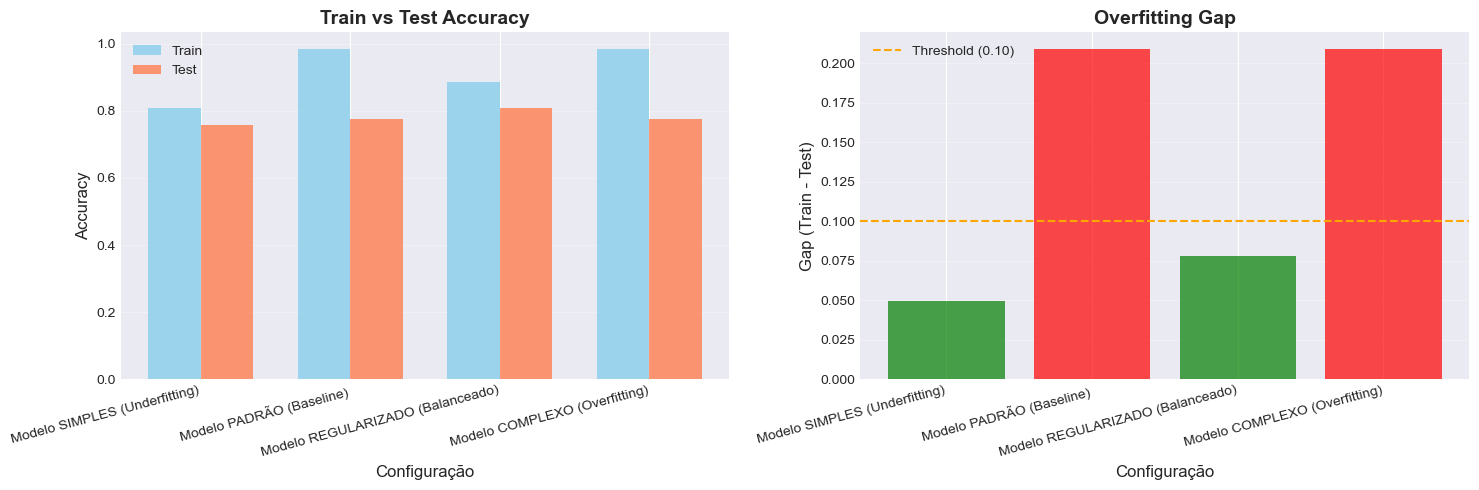


🎓 LIÇÕES APRENDIDAS:
1. 📉 Modelo SIMPLES: Baixo accuracy → Underfitting
2. 📊 Modelo PADRÃO: Bom, mas pode ter overfitting
3. ⚖️ Modelo REGULARIZADO: Melhor generalização (menor gap)
4. 📈 Modelo COMPLEXO: Alto train accuracy, mas overfitting

💡 Conclusão: Hiperparâmetros corretos fazem TODA a diferença!


In [10]:
# 🧪 Demonstração Prática: Impacto dos Hiperparâmetros

print("=" * 80)
print("🔬 DEMONSTRAÇÃO: IMPACTO DOS HIPERPARÂMETROS NO RANDOM FOREST")
print("=" * 80)

# Vamos testar 4 configurações diferentes
configs = [
    {
        'name': '1️⃣ Modelo SIMPLES (Underfitting)',
        'params': {
            'n_estimators': 10,
            'max_depth': 3,
            'min_samples_leaf': 20,
            'random_state': 42
        },
        'description': '↓ Poucas árvores, raso, muitas amostras por folha'
    },
    {
        'name': '2️⃣ Modelo PADRÃO (Baseline)',
        'params': {
            'n_estimators': 100,
            'max_depth': None,
            'min_samples_leaf': 1,
            'random_state': 42
        },
        'description': '📌 Valores padrão do scikit-learn'
    },
    {
        'name': '3️⃣ Modelo REGULARIZADO (Balanceado)',
        'params': {
            'n_estimators': 200,
            'max_depth': 15,
            'min_samples_leaf': 5,
            'max_features': 'sqrt',
            'random_state': 42
        },
        'description': '⚖️ Equilíbrio entre complexidade e generalização'
    },
    {
        'name': '4️⃣ Modelo COMPLEXO (Overfitting)',
        'params': {
            'n_estimators': 500,
            'max_depth': None,
            'min_samples_leaf': 1,
            'max_features': None,
            'random_state': 42
        },
        'description': '↑ Muitas árvores, profundo, sem restrições'
    }
]

# Treinar e avaliar cada configuração
results_comparison = []

for config in configs:
    print(f"\n{'='*80}")
    print(f"{config['name']}")
    print(f"Descrição: {config['description']}")
    print(f"Parâmetros: {config['params']}")
    print(f"{'='*80}")
    
    # Criar e treinar modelo
    model = RandomForestClassifier(**config['params'])
    model.fit(X_train, y_train)
    
    # Avaliar em treino e teste
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    gap = train_acc - test_acc
    
    # Guardar resultados
    results_comparison.append({
        'Configuração': config['name'].split(' ', 1)[1],
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Gap': gap,
        'n_estimators': config['params']['n_estimators'],
        'max_depth': config['params'].get('max_depth', 'None')
    })
    
    # Exibir resultados
    print(f"\n📊 Resultados:")
    print(f"   Train Accuracy: {train_acc:.4f}")
    print(f"   Test Accuracy:  {test_acc:.4f}")
    print(f"   Gap (overfit):  {gap:.4f}")
    
    # Diagnóstico
    if gap > 0.15:
        print(f"   ⚠️ OVERFITTING! Modelo decorou os dados de treino.")
    elif test_acc < 0.75:
        print(f"   ⚠️ UNDERFITTING! Modelo muito simples.")
    else:
        print(f"   ✅ BOM FIT! Modelo balanceado.")

# Criar DataFrame com resultados
df_comparison = pd.DataFrame(results_comparison)

print(f"\n{'='*80}")
print("📊 COMPARAÇÃO FINAL")
print(f"{'='*80}\n")
print(df_comparison.to_string(index=False))

# Visualizar comparação
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Accuracy comparison
x_pos = range(len(df_comparison))
width = 0.35

axes[0].bar([p - width/2 for p in x_pos], df_comparison['Train Acc'], 
            width, label='Train', alpha=0.8, color='skyblue')
axes[0].bar([p + width/2 for p in x_pos], df_comparison['Test Acc'], 
            width, label='Test', alpha=0.8, color='coral')
axes[0].set_xlabel('Configuração', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Train vs Test Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(df_comparison['Configuração'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Subplot 2: Gap (Overfitting indicator)
colors = ['red' if gap > 0.15 else 'yellow' if gap > 0.10 else 'green' 
          for gap in df_comparison['Gap']]
axes[1].bar(x_pos, df_comparison['Gap'], color=colors, alpha=0.7)
axes[1].axhline(y=0.10, color='orange', linestyle='--', label='Threshold (0.10)')
axes[1].set_xlabel('Configuração', fontsize=12)
axes[1].set_ylabel('Gap (Train - Test)', fontsize=12)
axes[1].set_title('Overfitting Gap', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(df_comparison['Configuração'], rotation=15, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("🎓 LIÇÕES APRENDIDAS:")
print(f"{'='*80}")
print("1. 📉 Modelo SIMPLES: Baixo accuracy → Underfitting")
print("2. 📊 Modelo PADRÃO: Bom, mas pode ter overfitting")
print("3. ⚖️ Modelo REGULARIZADO: Melhor generalização (menor gap)")
print("4. 📈 Modelo COMPLEXO: Alto train accuracy, mas overfitting")
print("\n💡 Conclusão: Hiperparâmetros corretos fazem TODA a diferença!")
print(f"{'='*80}")

In [8]:
# Definir grid de hiperparâmetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print("🔍 Grid Search - Random Forest")
print(f"Total de combinações: {np.prod([len(v) for v in param_grid_rf.values()])}")
print(f"\nParâmetros a testar:")
for param, values in param_grid_rf.items():
    print(f"  {param}: {values}")

🔍 Grid Search - Random Forest
Total de combinações: 216

Parâmetros a testar:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, 30, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']


In [9]:
# Executar Grid Search com Cross-Validation
print("⏳ Executando Grid Search... (isso pode demorar alguns minutos)\n")

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Usar todos os cores disponíveis
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("\n✅ Grid Search concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in grid_search_rf.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Melhor score (CV): {grid_search_rf.best_score_:.4f}")

# Avaliar no teste
y_pred_grid = grid_search_rf.best_estimator_.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)

print(f"📊 Accuracy no teste: {accuracy_grid:.4f}")

⏳ Executando Grid Search... (isso pode demorar alguns minutos)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Grid Search concluído!

🏆 Melhores hiperparâmetros:
  max_depth: 10
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 300

📊 Melhor score (CV): 0.8505
📊 Accuracy no teste: 0.7865

✅ Grid Search concluído!

🏆 Melhores hiperparâmetros:
  max_depth: 10
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 300

📊 Melhor score (CV): 0.8505
📊 Accuracy no teste: 0.7865


---

## 4. 🎲 Random Search - Busca Aleatória

**Random Search** testa combinações **aleatórias** de hiperparâmetros.

### Vantagens:
- ✅ Mais eficiente que Grid Search
- ✅ Explora melhor o espaço de hiperparâmetros
- ✅ Permite distribuições contínuas

### Desvantagens:
- ❌ Não garante encontrar o melhor
- ❌ Precisa definir número de iterações

### Exemplo: XGBoost

In [11]:
from scipy.stats import randint, uniform

# Definir distribuições de hiperparâmetros para XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5)
}

print("🎲 Random Search - XGBoost")
print(f"\nParâmetros (distribuições):")
for param, dist in param_dist_xgb.items():
    print(f"  {param}: {dist}")

🎲 Random Search - XGBoost

Parâmetros (distribuições):
  n_estimators: <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AF6837C830>
  max_depth: <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AF683AE0D0>
  learning_rate: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002AF6837D2B0>
  subsample: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002AF683AEE90>
  colsample_bytree: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002AF683AF110>
  min_child_weight: <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AF683AF250>
  gamma: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002AF683D82B0>


In [12]:
# Executar Random Search
print("⏳ Executando Random Search (100 iterações)...\n")

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=100,  # Número de combinações aleatórias
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search_xgb.fit(X_train, y_train)

print("\n✅ Random Search concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in random_search_xgb.best_params_.items():
    print(f"  {param}: {value:.4f}" if isinstance(value, float) else f"  {param}: {value}")

print(f"\n📊 Melhor score (CV): {random_search_xgb.best_score_:.4f}")

# Avaliar no teste
y_pred_random = random_search_xgb.best_estimator_.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

print(f"📊 Accuracy no teste: {accuracy_random:.4f}")

⏳ Executando Random Search (100 iterações)...

Fitting 5 folds for each of 100 candidates, totalling 500 fits

✅ Random Search concluído!

🏆 Melhores hiperparâmetros:
  colsample_bytree: 0.9022
  gamma: 0.1144
  learning_rate: 0.0331
  max_depth: 5
  min_child_weight: 3
  n_estimators: 185
  subsample: 0.9522

📊 Melhor score (CV): 0.8547
📊 Accuracy no teste: 0.8090

✅ Random Search concluído!

🏆 Melhores hiperparâmetros:
  colsample_bytree: 0.9022
  gamma: 0.1144
  learning_rate: 0.0331
  max_depth: 5
  min_child_weight: 3
  n_estimators: 185
  subsample: 0.9522

📊 Melhor score (CV): 0.8547
📊 Accuracy no teste: 0.8090


---

## 5. 🔄 Cross-Validation Strategies

### 5.1 K-Fold Cross-Validation

Divide os dados em **K folds** e treina K vezes (cada fold vira teste uma vez).

In [13]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate

# Modelo simples para demonstração
rf_simple = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation com múltiplas métricas
scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(
    rf_simple, 
    X_train, 
    y_train, 
    cv=10,  # 10-fold
    scoring=scoring,
    return_train_score=True
)

print("🔄 10-Fold Cross-Validation - Random Forest\n")
print("📊 Resultados médios:")
for metric in scoring:
    train_scores = cv_results[f'train_{metric}']
    test_scores = cv_results[f'test_{metric}']
    
    print(f"\n{metric.upper()}:")
    print(f"  Train: {train_scores.mean():.4f} (±{train_scores.std():.4f})")
    print(f"  Test:  {test_scores.mean():.4f} (±{test_scores.std():.4f})")

🔄 10-Fold Cross-Validation - Random Forest

📊 Resultados médios:

ACCURACY:
  Train: 0.9859 (±0.0017)
  Test:  0.8153 (±0.0508)

PRECISION:
  Train: 0.9942 (±0.0028)
  Test:  0.7778 (±0.0756)

RECALL:
  Train: 0.9691 (±0.0037)
  Test:  0.7323 (±0.1193)

F1:
  Train: 0.9815 (±0.0023)
  Test:  0.7496 (±0.0813)


### 5.2 Stratified K-Fold

Mantém a **proporção das classes** em cada fold (importante para datasets desbalanceados).

In [14]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results_stratified = cross_validate(
    rf_simple, 
    X_train, 
    y_train, 
    cv=skf,
    scoring=scoring,
    return_train_score=True
)

print("🔄 Stratified 10-Fold Cross-Validation\n")
print("📊 Resultados médios:")
for metric in scoring:
    train_scores = cv_results_stratified[f'train_{metric}']
    test_scores = cv_results_stratified[f'test_{metric}']
    
    print(f"\n{metric.upper()}:")
    print(f"  Train: {train_scores.mean():.4f} (±{train_scores.std():.4f})")
    print(f"  Test:  {test_scores.mean():.4f} (±{test_scores.std():.4f})")

print("\n💡 Stratified K-Fold mantém proporção das classes em cada fold!")

🔄 Stratified 10-Fold Cross-Validation

📊 Resultados médios:

ACCURACY:
  Train: 0.9857 (±0.0013)
  Test:  0.8195 (±0.0419)

PRECISION:
  Train: 0.9893 (±0.0032)
  Test:  0.7777 (±0.0683)

RECALL:
  Train: 0.9735 (±0.0033)
  Test:  0.7515 (±0.0690)

F1:
  Train: 0.9813 (±0.0017)
  Test:  0.7621 (±0.0555)

💡 Stratified K-Fold mantém proporção das classes em cada fold!


---

## 6. 📈 Learning Curves - Diagnóstico de Overfitting/Underfitting

**Learning Curves** mostram como a performance evolui com o tamanho do dataset.

### Interpretação:
- 📉 **Overfitting:** Grande gap entre train e validation
- 📉 **Underfitting:** Ambos scores baixos
- ✅ **Bom fit:** Train e validation convergem em score alto

In [16]:
def plot_learning_curve(estimator, X, y, title, cv=5):
    """
    Plota learning curve para diagnosticar overfitting/underfitting
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, 
        cv=cv, 
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    plt.figure(figsize=(10, 6))
    
    # Train score
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color='r')
    
    # Validation score
    plt.plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                     alpha=0.1, color='g')
    
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Diagnóstico
    gap = train_mean[-1] - val_mean[-1]
    print(f"\n📊 Diagnóstico ({title}):")
    print(f"  Training score final: {train_mean[-1]:.4f}")
    print(f"  Validation score final: {val_mean[-1]:.4f}")
    print(f"  Gap (train - val): {gap:.4f}")
    
    if gap > 0.10:
        print("  ⚠️ OVERFITTING detectado! Considere:")
        print("     - Aumentar dataset")
        print("     - Regularização (max_depth, min_samples_leaf)")
        print("     - Feature selection")
    elif val_mean[-1] < 0.75:
        print("  ⚠️ UNDERFITTING detectado! Considere:")
        print("     - Modelo mais complexo")
        print("     - Feature engineering")
        print("     - Mais features")
    else:
        print("  ✅ Bom fit! Modelo bem calibrado.")

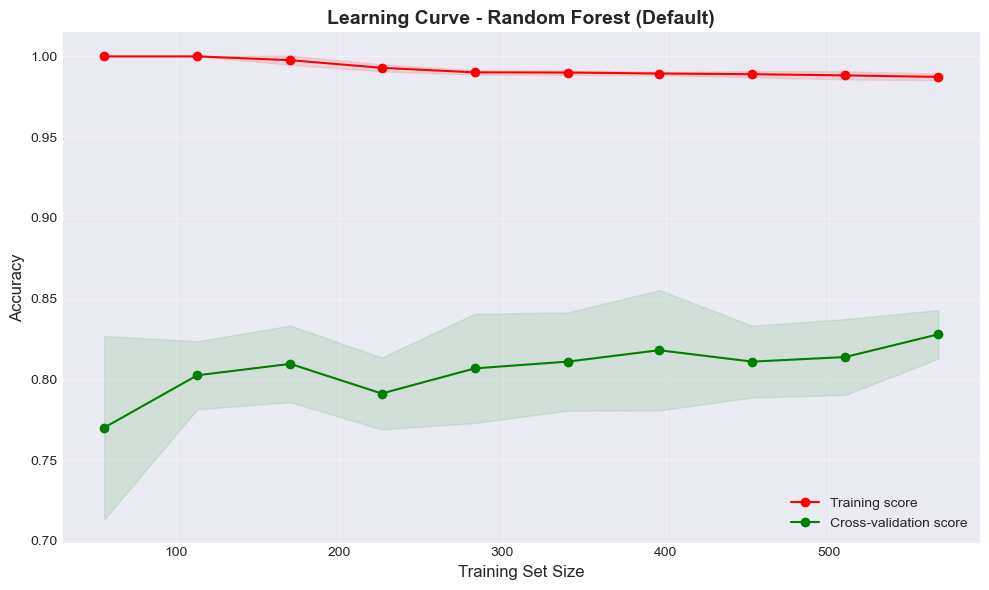


📊 Diagnóstico (Learning Curve - Random Forest (Default)):
  Training score final: 0.9873
  Validation score final: 0.8279
  Gap (train - val): 0.1594
  ⚠️ OVERFITTING detectado! Considere:
     - Aumentar dataset
     - Regularização (max_depth, min_samples_leaf)
     - Feature selection


In [17]:
# Learning Curve - Random Forest (default)
rf_default = RandomForestClassifier(n_estimators=100, random_state=42)
plot_learning_curve(rf_default, X_train, y_train, 
                   'Learning Curve - Random Forest (Default)')

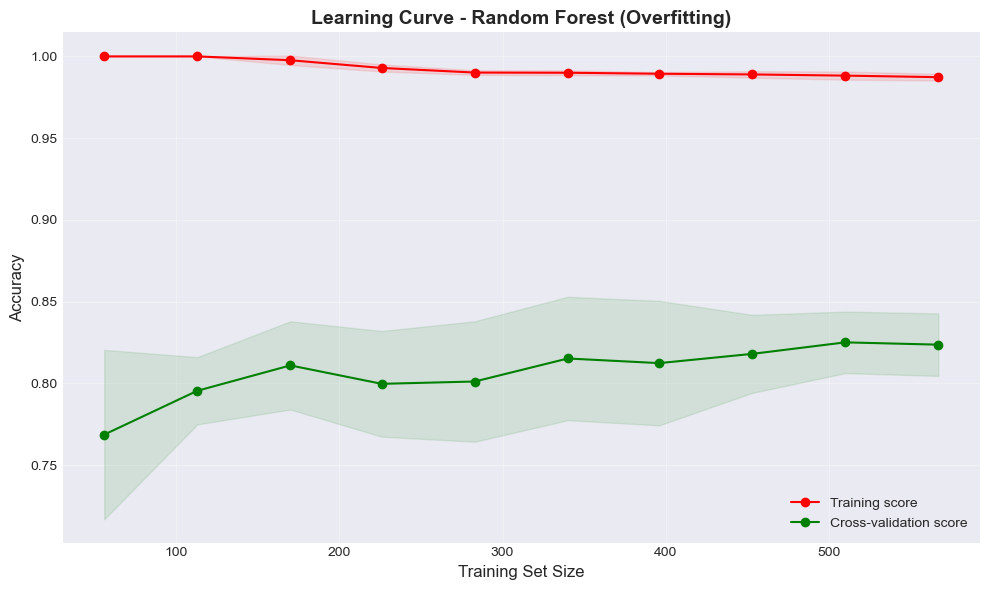


📊 Diagnóstico (Learning Curve - Random Forest (Overfitting)):
  Training score final: 0.9873
  Validation score final: 0.8237
  Gap (train - val): 0.1636
  ⚠️ OVERFITTING detectado! Considere:
     - Aumentar dataset
     - Regularização (max_depth, min_samples_leaf)
     - Feature selection


In [18]:
# Learning Curve - Random Forest (Overfitting intencional)
rf_overfit = RandomForestClassifier(
    n_estimators=500, 
    max_depth=None,  # Sem limite
    min_samples_leaf=1,
    random_state=42
)
plot_learning_curve(rf_overfit, X_train, y_train, 
                   'Learning Curve - Random Forest (Overfitting)')

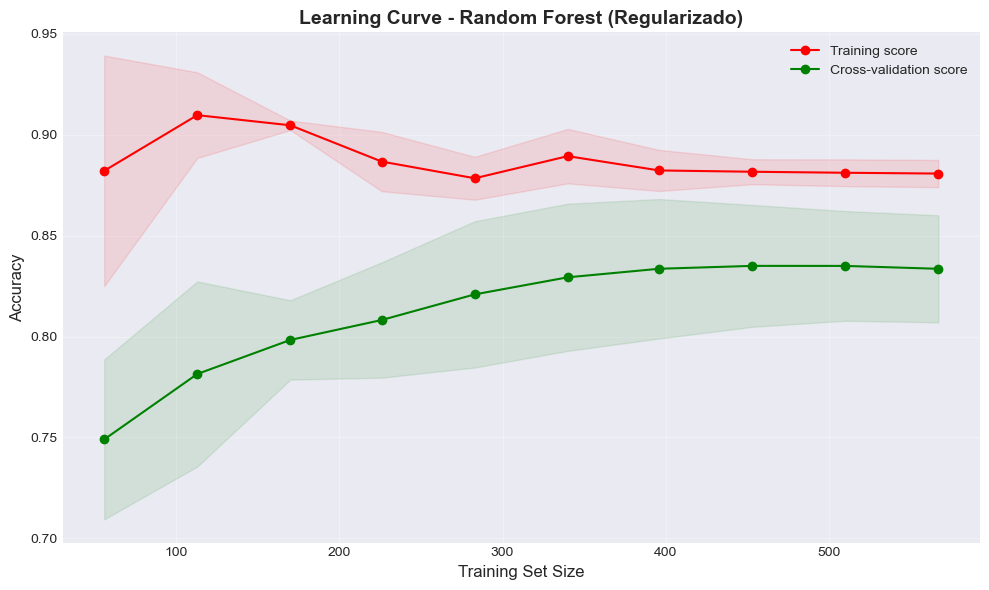


📊 Diagnóstico (Learning Curve - Random Forest (Regularizado)):
  Training score final: 0.8808
  Validation score final: 0.8336
  Gap (train - val): 0.0472
  ✅ Bom fit! Modelo bem calibrado.


In [19]:
# Learning Curve - Random Forest (Regularizado)
rf_regularized = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,  # Limitar profundidade
    min_samples_leaf=5,  # Mais amostras por folha
    random_state=42
)
plot_learning_curve(rf_regularized, X_train, y_train, 
                   'Learning Curve - Random Forest (Regularizado)')

---

## 7. 🔧 Pipeline ML Completo

**Pipeline** automatiza todo o fluxo:
1. Feature scaling
2. Feature selection
3. Treinamento do modelo

### Vantagens:
- ✅ Evita data leakage
- ✅ Código limpo e reproduzível
- ✅ Fácil de aplicar em novos dados

In [20]:
# Pipeline completo: Scaling → Feature Selection → Model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=10)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hiperparâmetros do pipeline
param_grid_pipeline = {
    'feature_selection__k': [5, 10, 15, 20],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4]
}

print("🔧 Pipeline ML:")
print(pipeline)
print(f"\nTotal de combinações: {np.prod([len(v) for v in param_grid_pipeline.values()])}")

🔧 Pipeline ML:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('classifier', RandomForestClassifier(random_state=42))])

Total de combinações: 108


In [21]:
# Grid Search no Pipeline
print("⏳ Executando Grid Search no Pipeline...\n")

grid_search_pipeline = GridSearchCV(
    pipeline,
    param_grid_pipeline,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_pipeline.fit(X_train, y_train)

print("\n✅ Grid Search Pipeline concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in grid_search_pipeline.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Melhor score (CV): {grid_search_pipeline.best_score_:.4f}")

# Avaliar no teste
y_pred_pipeline = grid_search_pipeline.best_estimator_.predict(X_test)
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)

print(f"📊 Accuracy no teste: {accuracy_pipeline:.4f}")

⏳ Executando Grid Search no Pipeline...

Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Grid Search Pipeline concluído!

🏆 Melhores hiperparâmetros:
  classifier__max_depth: 10
  classifier__min_samples_leaf: 2
  classifier__n_estimators: 100
  feature_selection__k: 15

📊 Melhor score (CV): 0.8477
📊 Accuracy no teste: 0.8202

✅ Grid Search Pipeline concluído!

🏆 Melhores hiperparâmetros:
  classifier__max_depth: 10
  classifier__min_samples_leaf: 2
  classifier__n_estimators: 100
  feature_selection__k: 15

📊 Melhor score (CV): 0.8477
📊 Accuracy no teste: 0.8202


---

## 8. 🎯 Feature Selection

### 8.1 SelectKBest - Univariate Feature Selection

In [22]:
# SelectKBest - seleciona K melhores features
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Features selecionadas
selected_features = X_train.columns[selector.get_support()].tolist()

print(f"🎯 SelectKBest (k=10)\n")
print(f"Features selecionadas ({len(selected_features)}):")
for i, feat in enumerate(selected_features, 1):
    print(f"  {i}. {feat}")

# Scores das features
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print(f"\n📊 Top 10 features por score:")
print(feature_scores.head(10).to_string(index=False))

🎯 SelectKBest (k=10)

Features selecionadas (10):
  1. pclass
  2. age
  3. parents/children aboard
  4. fare
  5. sex_male
  6. age_group_Adult
  7. age_group_Senior
  8. fare_group_Medium
  9. fare_group_High
  10. fare_group_VeryHigh

📊 Top 10 features por score:
                Feature      Score
               sex_male 303.524272
                 pclass  87.269169
                   fare  61.154051
    fare_group_VeryHigh  44.239301
parents/children aboard   7.204561
      fare_group_Medium   6.350916
       age_group_Senior   4.821066
                    age   4.146338
        fare_group_High   3.100156
        age_group_Adult   2.689369


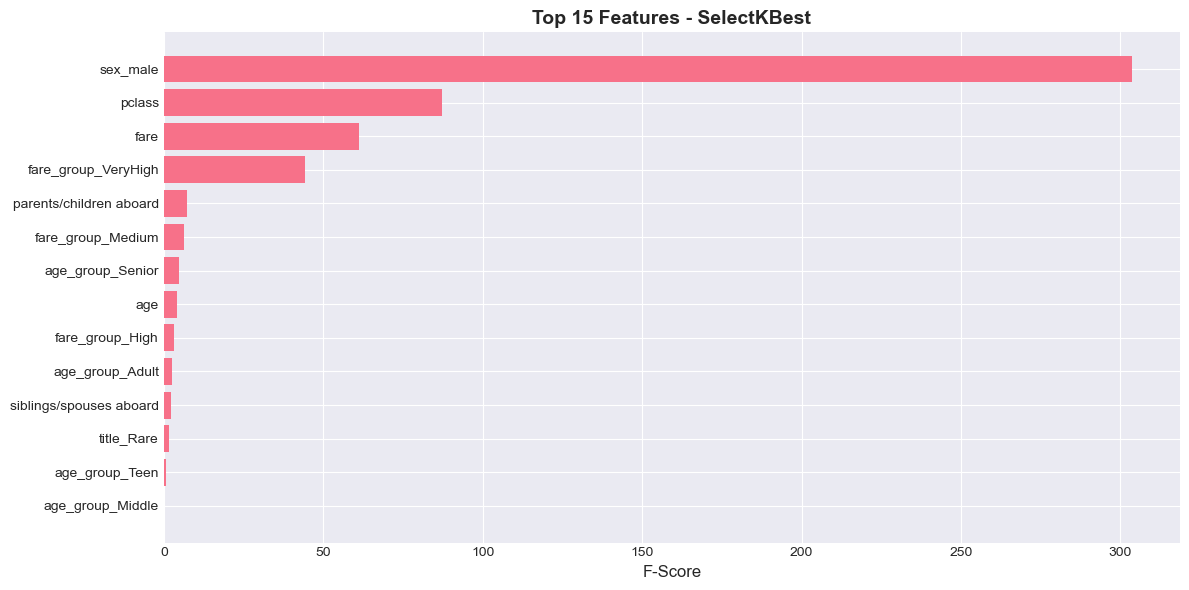

In [23]:
# Visualizar scores
plt.figure(figsize=(12, 6))
plt.barh(feature_scores['Feature'].head(15), feature_scores['Score'].head(15))
plt.xlabel('F-Score', fontsize=12)
plt.title('Top 15 Features - SelectKBest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 8.2 RFE - Recursive Feature Elimination

In [24]:
# RFE - elimina features recursivamente
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Features selecionadas
rfe_features = X_train.columns[rfe.support_].tolist()

print(f"🎯 RFE (n_features=10)\n")
print(f"Features selecionadas ({len(rfe_features)}):")
for i, feat in enumerate(rfe_features, 1):
    print(f"  {i}. {feat}")

# Ranking
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print(f"\n📊 Feature Ranking (1 = melhor):")
print(feature_ranking.to_string(index=False))

🎯 RFE (n_features=10)

Features selecionadas (10):
  1. pclass
  2. age
  3. siblings/spouses aboard
  4. parents/children aboard
  5. fare
  6. sex_male
  7. age_group_Adult
  8. age_group_Middle
  9. fare_group_High
  10. fare_group_VeryHigh

📊 Feature Ranking (1 = melhor):
                Feature  Ranking
                 pclass        1
                    age        1
siblings/spouses aboard        1
parents/children aboard        1
                   fare        1
               sex_male        1
       age_group_Middle        1
        age_group_Adult        1
    fare_group_VeryHigh        1
        fare_group_High        1
      fare_group_Medium        2
         age_group_Teen        3
       age_group_Senior        4
             title_Rare        5


---

## 9. 🔬 PCA - Principal Component Analysis

**PCA** reduz dimensionalidade mantendo a **máxima variância** dos dados.

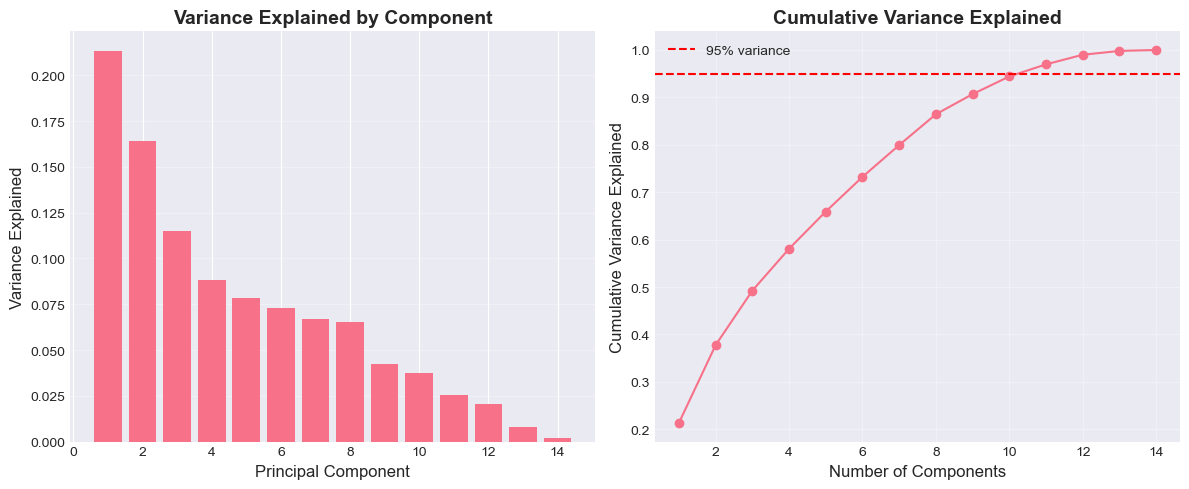


📊 Componentes para 95% variância: 11
📊 Features originais: 14
📊 Redução: 3 features


In [25]:
# PCA - redução de dimensionalidade
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA completo para ver variância explicada
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Variância explicada acumulada
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plotar
plt.figure(figsize=(12, 5))

# Subplot 1: Variância por componente
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.title('Variance Explained by Component', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Variância acumulada
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 'o-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance Explained', fontsize=12)
plt.title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Número de componentes para 95% variância
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
print(f"\n📊 Componentes para 95% variância: {n_components_95}")
print(f"📊 Features originais: {X_train.shape[1]}")
print(f"📊 Redução: {X_train.shape[1] - n_components_95} features")

In [26]:
# Aplicar PCA com n_components otimizado
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"🔬 PCA aplicado!")
print(f"Shape original: {X_train_scaled.shape}")
print(f"Shape após PCA: {X_train_pca.shape}")
print(f"Variância explicada: {pca.explained_variance_ratio_.sum():.4f}")

# Treinar modelo com PCA
rf_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\n📊 Accuracy com PCA: {accuracy_pca:.4f}")

🔬 PCA aplicado!
Shape original: (709, 14)
Shape após PCA: (709, 11)
Variância explicada: 0.9697

📊 Accuracy com PCA: 0.7472

📊 Accuracy com PCA: 0.7472


---

## 10. 📊 Comparação Final de Modelos

In [27]:
# Compilar resultados
results = {
    'Model': [
        'Random Forest (Grid Search)',
        'XGBoost (Random Search)',
        'Pipeline (Grid Search)',
        'Random Forest (PCA)'
    ],
    'Accuracy': [
        accuracy_grid,
        accuracy_random,
        accuracy_pipeline,
        accuracy_pca
    ],
    'CV Score': [
        grid_search_rf.best_score_,
        random_search_xgb.best_score_,
        grid_search_pipeline.best_score_,
        np.nan  # Não temos CV score para PCA
    ]
}

df_results = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

print("\n🏆 COMPARAÇÃO FINAL DE MODELOS\n")
print(df_results.to_string(index=False))

print(f"\n🥇 Melhor modelo: {df_results.iloc[0]['Model']}")
print(f"📊 Accuracy: {df_results.iloc[0]['Accuracy']:.4f}")


🏆 COMPARAÇÃO FINAL DE MODELOS

                      Model  Accuracy  CV Score
     Pipeline (Grid Search)  0.820225  0.847708
    XGBoost (Random Search)  0.808989  0.854740
Random Forest (Grid Search)  0.786517  0.850514
        Random Forest (PCA)  0.747191       NaN

🥇 Melhor modelo: Pipeline (Grid Search)
📊 Accuracy: 0.8202


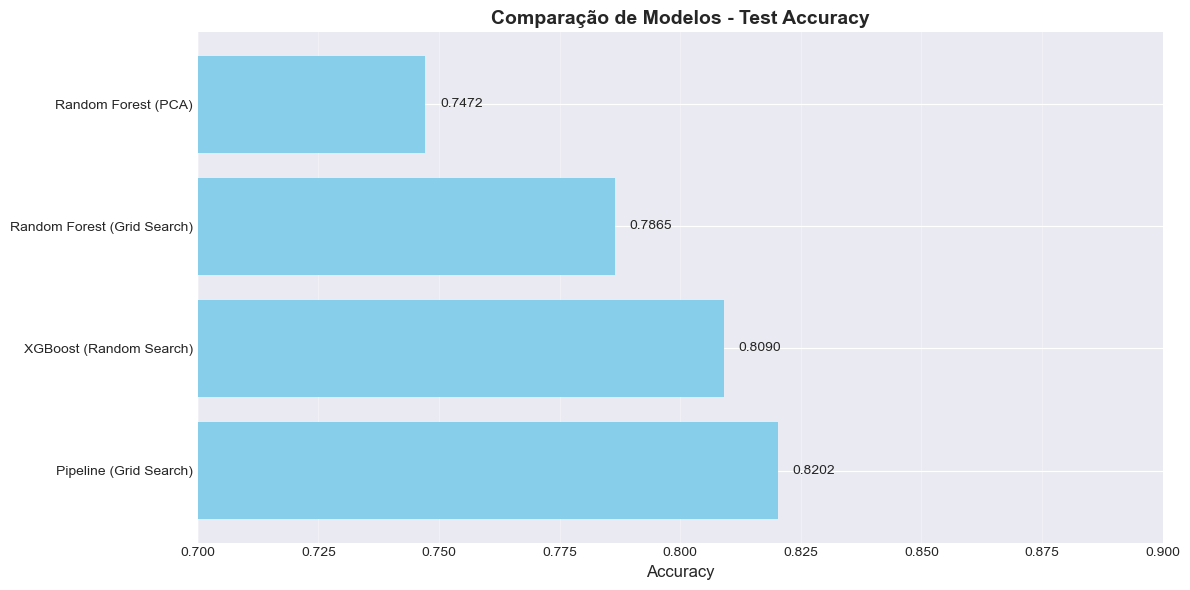

In [28]:
# Visualizar comparação
plt.figure(figsize=(12, 6))
plt.barh(df_results['Model'], df_results['Accuracy'], color='skyblue')
plt.xlabel('Accuracy', fontsize=12)
plt.title('Comparação de Modelos - Test Accuracy', fontsize=14, fontweight='bold')
plt.xlim(0.7, 0.9)
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (model, acc) in enumerate(zip(df_results['Model'], df_results['Accuracy'])):
    plt.text(acc + 0.003, i, f'{acc:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

---

## 11. 🎓 Resumo e Conclusões

### 🏆 O que aprendemos:

1. **Grid Search vs Random Search**
   - Grid Search: exaustivo, garantido, mas caro
   - Random Search: eficiente, explora melhor, mas não garantido

2. **Cross-Validation**
   - K-Fold: divisão simples em K folds
   - Stratified K-Fold: mantém proporção de classes (melhor para classificação)

3. **Learning Curves**
   - Diagnóstico visual de overfitting/underfitting
   - Gap grande = overfitting
   - Scores baixos = underfitting

4. **Pipeline ML**
   - Automatiza preprocessing + feature selection + model
   - Evita data leakage
   - Código reproduzível

5. **Feature Selection**
   - SelectKBest: rápido, univariado
   - RFE: recursivo, mais robusto

6. **PCA**
   - Reduz dimensionalidade
   - Mantém variância
   - Pode perder interpretabilidade

### 📈 Próximos passos:
- **Dia 3:** Dashboard React interativo
- Integração full-stack (Python API + React)
- Visualizações em tempo real

---

### ✅ Checklist Dia 2:
- [x] Grid Search implementado
- [x] Random Search implementado
- [x] Cross-validation (K-Fold e Stratified)
- [x] Learning curves analisadas
- [x] Pipeline ML completo
- [x] Feature selection (SelectKBest + RFE)
- [x] PCA aplicado
- [x] Comparação final de modelos

**Status:** ✅ DIA 2 CONCLUÍDO!